In [1]:
import warnings
warnings.simplefilter('ignore')

In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, PReLU, LeakyReLU
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()

In [4]:
Xtrain.shape

(60000, 28, 28)

In [5]:
print(Xtrain[0].shape) #1st image
print(Xtrain[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [6]:
Xtrain.shape, Xtest.shape

((60000, 28, 28), (10000, 28, 28))

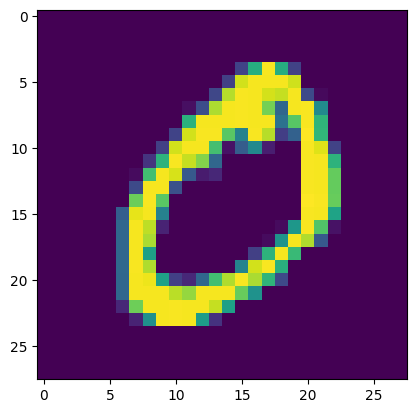

In [7]:
plt.imshow(Xtrain[1])

In [8]:
ytrain #similar as above image

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
Xtrain = Xtrain/255
xtest = Xtest/255

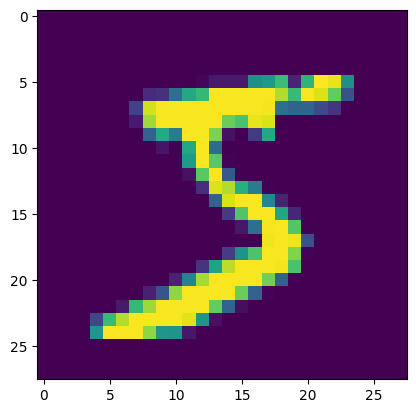

In [10]:
plt.imshow(Xtrain[0])

## Creating the CNN model

In [17]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu', input_shape=(28,28,1)))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation=LeakyReLU()))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation=PReLU(alpha_initializer=initializers.Constant(value=0.1)))) 
# value=0.3 will be Leaky Relu

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 32)          9760      
                                                                 
Total params: 28,864
Trainable params: 28,864
Non-trai

In [19]:
model.add(Flatten(input_shape=(28,28))) #input layer

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 32)          9760      
                                                                 
 flatten (Flatten)           (None, 512)              

In [24]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model.fit(Xtrain,ytrain,epochs=50,validation_split=0.3, callbacks=[early_stopping])

Epoch 1/50
1313/1313 [==============================] - 39s 29ms/step - loss: 0.3335 - accuracy: 0.8939 - val_loss: 0.0818 - val_accuracy: 0.9771
Epoch 2/50
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0964 - accuracy: 0.9743 - val_loss: 0.0738 - val_accuracy: 0.9818
Epoch 3/50
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0741 - accuracy: 0.9810 - val_loss: 0.0571 - val_accuracy: 0.9863
Epoch 4/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0609 - accuracy: 0.9844 - val_loss: 0.0561 - val_accuracy: 0.9873
Epoch 5/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0475 - accuracy: 0.9879 - val_loss: 0.0506 - val_accuracy: 0.9887
Epoch 6/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0458 - accuracy: 0.9886 - val_loss: 0.0618 - val_accuracy: 0.9866
Epoch 7/50
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0613 -

In [27]:
model.predict(Xtest)

313/313 [==============================] - 4s 11ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_probab = model.predict(Xtest)

313/313 [==============================] - 4s 11ms/step


In [29]:
y_probab

# in every row, which ever position has 1, it means model is telling that the number in this index ...
# has the highest probability of being there.

# EG - [0., 0., 0., ..., 1., 0., 0.] -> 7th position has 1. That means model thinks that the number is 7

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
ypred = y_probab.argmax(axis=1) #getting maximum probability from index

In [31]:
accuracy_score(ytest,ypred)

0.9883

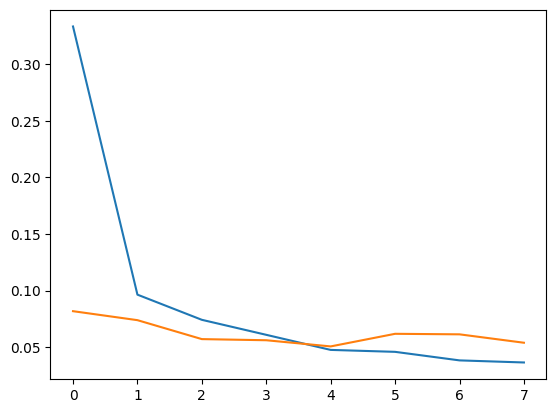

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

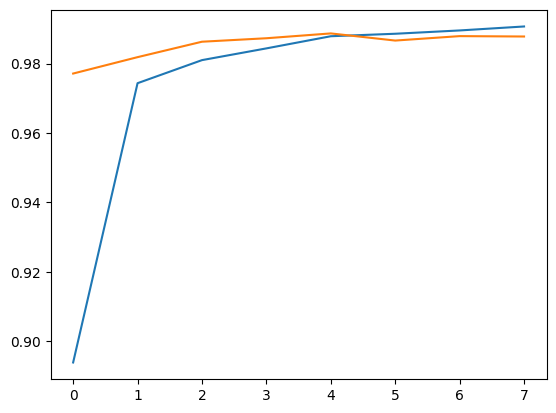

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

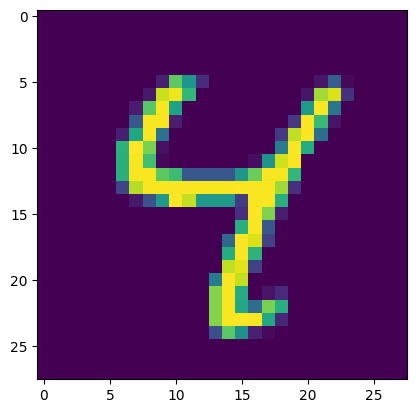

In [35]:
plt.imshow(Xtest[6])

In [36]:
y_probab[6].argmax()

4